#### 10 октября 2024. while-3.Организация циклических процессов (часть III)

### Перебор делителей

**Перебор делителей** --- **алгоритм факторизации** или 
**тестирования простоты числа** путем полного перебора всех возможных делителей.

----
Пусть $n$ --- исходное число.

**Алгоритм "Перебор делителей":**

перебор целых чисел $k\in [2; \sqrt{n}]$ и вычисление `n % k`.  
Если `n % k == 0`, то $k$ является делителем $n$. При этом:

**При тестировании простоты числа $n$:**
число $n$ объявляется составным и алгоритм заканчивает работу.

**При факторизации $n$:**
печатается делитель $k$, число $n$ сокращается на $k$ и процедура повторяется  
(до достижения $\sqrt{n}$).


----
**Для очень больших чисел алгоритм не используется из-за низкой скорости работы.**


*Формально достаточно делить только на простые числа в нужном интервале, однако, для этого необходимо знать их множество.*

*На практике (бумажной) составляется таблица простых чисел и производится проверка небольших чисел (например, до $2^{16}$).*

**Возможные ускорения работы алгоритмы:**

- при переборе можно не проверять чётные делители, кроме числа 2,   
а также делители, кратные трём, кроме числа 3.



### Тест простоты числа

**Простое число** --- натуральное число, имеющее только два делителя: 
единицу и само это число. Число 1 не является простым.

**Тест простоты числа** --- алгоритм, который по заданному 
натуральному числу определяет, простое ли это число.

In [2]:
n = int(input('Input number (>1) >>> '))

flag = True
d = 2
while flag and d*d < n: 
    flag = n % d != 0
    d = d + 1

print('Prime number: ', flag)

Input number (>1) >>>  13


Prime number:  True


**Внимание!** Предложенная программа будет неверно работать для некоторых чисел. Модифицировать программу так, чтобы она выдавала верный результат для всех натуральных чисел.

In [11]:
# ГЛУПОСТИ! ДОГОВОРИМСЯ ТАК НЕ ПИСАТЬ!
n = int(input('Input number (>1) >>> '))

flag = True
d = 2
while flag and d*d < n:
    if n % d == 0:   # плохо. НА КР задание = 0
        flag = False  # плохо. НА КР задание = 0
    d = d + 1

print('Prime number: ', flag)

Input number (>1) >>> 17
Prime number:  True


----
# СТАРТ следующей лекции (17 октября)

### Пример: факторизация заданного числа

**Факторизация** --- разложение натурального числа на простые множители.

In [6]:
n = int(input('n >>> '))  # исходное число
print(n, '= ', end = '')

d = 2  # подбор делителей начинаем с двойки
while n != 1:
    if n % d == 0:
        print(d, end = ' ')
        n = n // d
    else:
        d = d + 1

n >>> 18
18 = 2 3 3 

### w3.2.1. Вычисление квадратного корня по формуле Герона

Итерационная формула Герона для вычисления $\sqrt{a}$ имеет вид:
$$
 y_i=\frac{1}{2}\left(y_{i-1} + \frac{a}{y_{i-1}}\right),\quad i=1,2,\dots
$$
При $i=1$ эта формула имеет вид
$$
 y_1=\frac{1}{2}\left(y_0 + \frac{a}{y_0}\right)
$$
То есть для вычисления $y_1$ требуется знать
$y_0$ --- начальное приближение, в качестве которого можно выбрать любое число ($>0$).


**Решение.**
Условие окончания процесса итераций:
$$
  |y_{i}-y_{i-1}| \leqslant \varepsilon,
$$
($|y_{i}-y_{i-1}|$ --- невязка).

Рекомендуемый вид $y_0$:
$$
  y_0=\frac{1+a}{2}.
$$

**Важно!** От выбора $y_0$ зависит число шагов, за которое достигается точность $\varepsilon$: чем ближе $y_0$ к результату, тем меньше шагов.


Например, при вычислении $\sqrt{2.1}$ точность $\varepsilon=10^{-6}$ достигается

- за 12 шагов при $y_0=100$;
- за 6 шагов при $y_0=2$;
- за 3 шага при $y_0=1.45$.

In [3]:
import math

a = float(input('a >>> '))

yp = (1 + a) / 2           # начальное приближение
y = (yp + a / yp) / 2      # первое приближение
while abs(y - yp) > 1e-6:
    yp = y                 # y_{i-1}
    y = (yp + a / yp) / 2  # y_i

print('sqrtH(a)      =', y)
print('math.sqrt(a)  =', math.sqrt(a)) # для проверки


a >>>  7


sqrtH(a)      = 2.6457513110645907
math.sqrt(a)  = 2.6457513110645907


Вычисления проводятся с точностью $10^{-6}$.

Выводить все цифры после запятой **НЕ НАДО**.


Выводить надо столько знаков после запятой, с какой точностью происходит вычисление (или на один знак больше, чтобы увидеть округляется последняя цифра или она точная).

Например, формат строки для вывода ответа с точностью $10^{-6}$:
```
print('Geron(a) = %12.6e' %y)
```

**Вывод с 6 знаками**
```
Geron(a) =  1.449138e+00
sqrt(a)  =  1.449138e+00
```

**Вывод с 7 знаками**
```
Geron(a) = 1.4491377e+00
sqrt(a)  = 1.4491377e+00
```

Напомним, что лучше выводить ответ в формате с плавающей точкой, и так, чтобы мантисса $\in [1;10)$.

**Вывод с 7 знаками для $\sqrt{1000}$**
```
Geron(a) = 3.1622777e+01
sqrt(a)  = 3.1622777e+01
```

----
## w3.2.2. Вычисление бесконечных сумм

**Пример w3.1.** 
Вычислить приближенное значение бесконечной суммы
$$
  1+\frac{1}{2^2}+\frac{1}{3^2}+\frac{1}{4^2}+{\dots} = \sum_{i=1}^\infty \frac{1}{i^2}= \sum_{i=1}^\infty y_i.
$$
Вычисления продолжать до тех пор пока очередное слагаемое не
окажется меньше числа $\varepsilon=10^{-5}$ ($y_i < \varepsilon$).

Условие окончания процесса суммирования
$$
  y_i < \varepsilon
$$
означает, что слагаемое $y_i$ будет давать вклад, несущественный по сравнению с искомой суммой, и его учитывать уже не надо.

**!!!** Условие окончания процесса суммирования в общем случае имеет вид
$$
  |y_i| < \varepsilon.
$$
 
(Ниже рисунок из практикума)

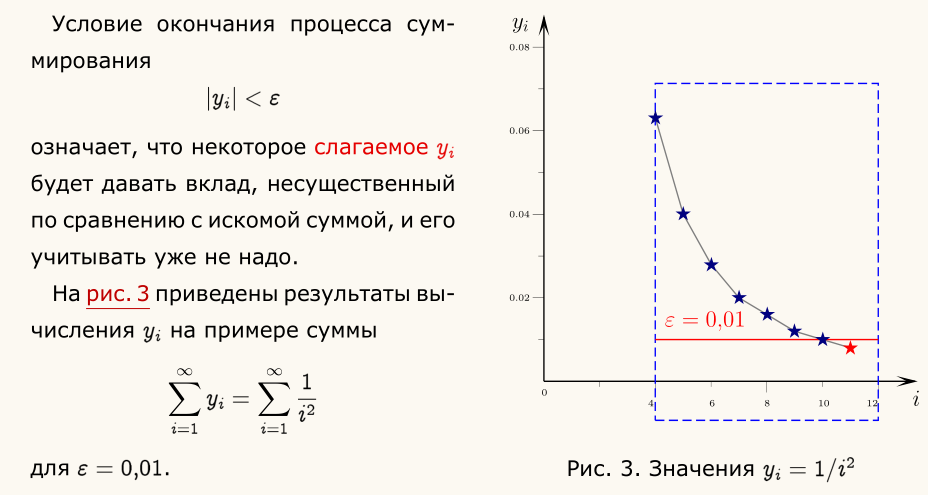

In [1]:
from IPython.display import Image # Библиотека для отображения картинок

display(Image(filename='sum_eps.png', width = 480))

Дана сумма:
$$
  \sum_{i=1}^\infty \frac{1}{i^2}= \sum_{i=1}^\infty y_i.
$$

**Решение.**
Общий член суммирования
$$
 y_i=\dfrac{1}{i^2},\quad i=1,2,\dots
$$

Формулу перепишем в виде
$$
  \underbrace{y_1 = 1}_{\text{инициализация}}\quad
  \underbrace{y_i=\dfrac{1}{i^2},\quad i=2,3,\dots}_{\text{в теле цикла}}
$$

In [6]:
sum_ = 0             # инициализация суммы
i, y = 1, 1          # I шаг: при i = 1, y = 1
while y >= 1e-5:
    sum_ += y       # вычисление суммы
    i += 1          # наращивание счётчика
    y = 1 / i / i   # общая формула
    
print('Ответ: %8.5f' % sum_)
print('Количество:', i-1)  # 316  Запомним!

Ответ:  1.64177
Количество: 316


До начала цикла **необходима инициализация**
- переменной для хранения результата суммирования (строка 1);
- значений $i$ и $y_i$ (строка 2 программы).

**Обязательная последовательность вычислений в цикле**:
$$
  sum\_ \to i \to y.
$$

Сравним результат работы программы с "точным" результатом:

In [9]:
from sympy import Symbol, Sum, oo, pprint

i = Symbol('i')

pprint(Sum(1/i/i, (i, 1, oo)))

s = Sum(1/i/i, (i, 1, oo)).doit()   
# результат: выражение pi**2/6
print(s)

s = s.evalf()                       
# результат: число 1.64493406684823  1.64177
print(s)

  ∞     
 ____   
 ╲      
  ╲   1 
   ╲  ──
   ╱   2
  ╱   i 
 ╱      
 ‾‾‾‾   
i = 1   
pi**2/6
1.64493406684823


Разность между приближенным и "точным" значением:

$$
|1{,}644934068-1{,}64177| = 0{,}3164068\cdot 10^{-2} > 10^{-5}
$$

В общем случае условие $|y_i| <  \varepsilon$
не означает, что разность между "точным" значением и приближенным значением суммы равна $\varepsilon$ (это верно только для знакопеременных рядов --- погрешность сходящегося знакопеременного ряда равна последнему отброшенному члену).

На рисунке ниже приведено сравнение значений суммы для разных $i$ со "точным" значением. Случай: $\varepsilon=0{,}01$.

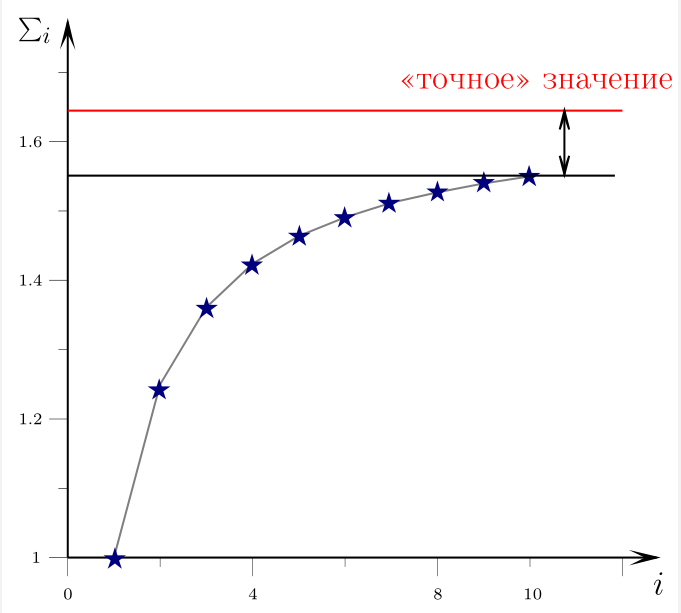

In [5]:
display(Image(filename='sum03.png', width = 350))

Выше в программе получили количество членов ряда, потребовавшееся для достижения заданной точности --- это 316. Если это число подставить в код с sympy (программа 7n.1.1S) вместо "oo" ("бесконечность" в sympy), то получим ответ, полностью совпадающий с ответом, полученным нашей программой. Ниже приведены обе программы вместе для лучшей визуализации этого факта.

### Программа w3.2.3. Алгоритм суммирования и проверка методами библиотеки sympy

In [3]:
from sympy import Symbol, Sum
from math import pi

# алгоритм
sum_ = 0             # инициализация суммы
i, y = 1, 1          # I шаг: при i = 1, y = 1
while abs(y) >= 1E-5:
    sum_ += y        # вычисление суммы
    i += 1           # наращивание счётчика
    y = 1 / i / i    # общая формула
    
print('Цикл:  %8.5f' % sum_)
cnt = i - 1         # запомнили количество членов суммирования 
print('Количество:', cnt)

# ------------------------------------------------------
# методы sympy для сравнения с нашим алгоритмом
j = Symbol('j')

s = Sum(1/j/j, (j, 1, cnt)).doit().evalf()
print('sympy: %8.5f' % s)

# ------------------------------------------------------
# сравнение с точным решением
print('Сравнение с точным решением')
exactValue = pi**2/6

print('Exact: %8.5f' % exactValue)
print(f'Сравнение: {abs(exactValue-sum_)}') 
# разность > 1e-5

Цикл:   1.64177
Количество: 316
sympy:  1.64177
Сравнение с точным решением
Exact:  1.64493
Сравнение: 0.003159555033499295


---
**Рекуррентное соотношение** позволяет выразить некоторый член последовательности приближений через предыдущий.
$$
 x^n = x^{n-1}x,\quad  n! = (n-1)!\cdot n.
$$

-----
**Пример w3.2.5.**
Получить формулу для вычисления членов последовательности
$$
  y_0=1;\quad
  y_1=\frac{x}{1!};\quad
  y_2=\frac{x^2}{2!};\quad
  y_3=\frac{x^3}{3!};\quad {\dots}
$$


Вид $y_i$:
$$
  y_i=\frac{x^i}{i!},\quad i=0,1,2,\dots\quad
$$
Программировать эту формулу нельзя!

Нужны рек. соотношения (**см. прилагаемые к лекции рисунки с процессом получения нужных соотношений**).

Рекуррентная формула имеет вид
$$
 y_i = \frac{x}{i} y_{i-1}.
$$
Для вычисления по этой формуле она должна быть дополнена интервалом изменения индексов и начальным условием
$$
  i = 1, 2,\dots,\quad y_0 = 1.
$$

---

**Пример 24o.2.5 (задание для программирования).** Найти сумму
$$
\sum\limits_{i=0}^\infty \frac{x^i}{i!}.
$$

В предыдущем примере были получены соотношения
$$
y_0 = 1,\quad y_i = \frac{x}{i} y_{i-1},\quad i = 1, 2,\dots
$$
Программа пишется **строго** по этим соотношениям!

### Программа 24o.2.5. Алгоритм суммирования.

In [7]:
from math import exp 

x = 0.25  # пока сделаем так, чтобы не вводить
sum_ = 0
i, y = 0, 1
while abs(y) >= 1e-5:
    sum_ += y
    i += 1
    y = y * x / i

print('sum_ = %8.5f' % sum_)
print('exp  = %8.5f' % exp(x))

sum_ =  1.28402
exp  =  1.28403


####  Можно для контроля вычислений добавить оператор печати

In [12]:
from math import exp 

EPS = 1e-5  # изменение

x = float(input('x >>> '))  # изменение

sum_ = 0  
i, y = 0, 1
print('%9.6f %2d %9.6f %7s' % (sum_, i, y, abs(y) >= EPS))
while abs(y) >= EPS:
    sum_ += y
    i += i
    y = y * x / i
    print('%9.6f %2d %9.6f %7s' % (sum_, i, y, abs(y) >= EPS))

print('Число шагов цикла = ', i)
print('sum_ = %8.5f' % sum_)
print('exp  = %8.5f' % exp(x))

x >>> 0.56
 0.000000  0  1.000000    True
 1.000000  1  0.560000    True
 1.560000  2  0.156800    True
 1.716800  3  0.029269    True
 1.746069  4  0.004098    True
 1.750167  5  0.000459    True
 1.750626  6  0.000043    True
 1.750669  7  0.000003   False
Число шагов цикла =  7
sum_ =  1.75067
exp  =  1.75067


**Почему обычно плохо напрямую вычислять выражения вида**
$$
  y_i=\frac{x^i}{i!}?
$$

При $x<1$, $i\to\infty$
$$
x^i\to 0,\quad i!\to \infty,
$$
т.е.
$$
  \frac{\text{очень маленькое число}}{\text{очень большое число}}.
$$

### Программа w3.25S (использование sympy). 

In [14]:
from sympy import *

i, x = symbols('i x')       # i и x как символы

pprint(Sum(x**i / factorial(i), (i, 0, oo)))

s = Sum(x**i / factorial(i), (i, 0, oo)).doit()

print(s)                    # exp(x)

s = s.subs(x, 0.1).evalf()  # 1.10517091807565
print(s)

  ∞     
 ____   
 ╲      
  ╲    i
   ╲  x 
   ╱  ──
  ╱   i!
 ╱      
 ‾‾‾‾   
i = 0   
exp(x)
1.10517091807565


Вызов метода `subs(x, 0.1)` осуществляет подстановку в выражение вместо $x$ 
  значения $0{,}1$.